In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Shape :  (337, 600, 3)


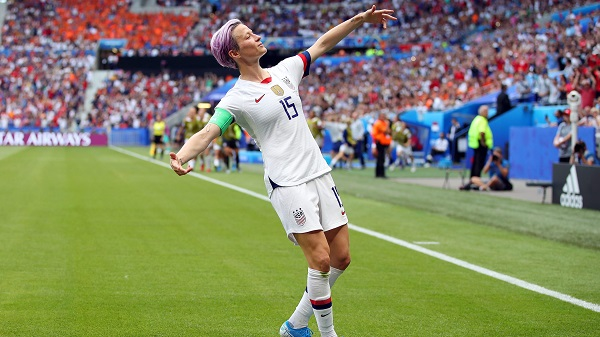

In [2]:
path = "/content/drive/MyDrive/OpenCV/Images/megan.jpg"
image = cv2.imread(path)
print("Shape : ", image.shape)
cv2_imshow(image)

In [4]:
image_blob = cv2.dnn.blobFromImage(image = image , scalefactor = 1./255,
                                   size = (image.shape[1], image.shape[0]))

type(image_blob),type(image)

(numpy.ndarray, numpy.ndarray)

In [5]:
image.shape, image_blob.shape # Batch 1 yani şuan bir resim ile ilgineliyoruz !!! # Sonra Channel, height, width

((337, 600, 3), (1, 3, 337, 600))

In [6]:
image_blob.max(),image_blob.min(),image.max(),image.min()

(1.0, 0.0, 255, 0)

# Loading The Pre Trained Neural Network

In [7]:
model = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/OpenCV/Weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                 "/content/drive/MyDrive/OpenCV/Weights/pose_iter_160000.caffemodel") # Path, weights 

In [10]:
print(model.getLayerNames())

['conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1_stage1', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2_stage1', 'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3', 'relu3_3', 'conv3_4', 'relu3_4', 'pool3_stage1', 'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3_CPM', 'relu4_3_CPM', 'conv4_4_CPM', 'relu4_4_CPM', 'conv5_1_CPM_L1', 'relu5_1_CPM_L1', 'conv5_1_CPM_L2', 'relu5_1_CPM_L2', 'conv5_2_CPM_L1', 'relu5_2_CPM_L1', 'conv5_2_CPM_L2', 'relu5_2_CPM_L2', 'conv5_3_CPM_L1', 'relu5_3_CPM_L1', 'conv5_3_CPM_L2', 'relu5_3_CPM_L2', 'conv5_4_CPM_L1', 'relu5_4_CPM_L1', 'conv5_4_CPM_L2', 'relu5_4_CPM_L2', 'conv5_5_CPM_L1', 'conv5_5_CPM_L2', 'concat_stage2', 'Mconv1_stage2_L1', 'Mrelu1_stage2_L1', 'Mconv1_stage2_L2', 'Mrelu1_stage2_L2', 'Mconv2_stage2_L1', 'Mrelu2_stage2_L1', 'Mconv2_stage2_L2', 'Mrelu2_stage2_L2', 'Mconv3_stage2_L1', 'Mrelu3_stage2_L1', 'Mconv3_stage2_L2', 'Mrelu3_stage2_L2', 'Mconv4_stage2_L1', 'Mrelu4_stage2_L1', 'Mconv4_stage2_L2', 'Mrelu4_stage2_L2', 'Mconv5_st

In [11]:
len(model.getLayerNames())

127

# Predicting Body Points

In [12]:
model.setInput(image_blob)
output = model.forward()
output.shape # Batch,Parts,height,width

(1, 44, 43, 75)

In [13]:
output[0,1].shape

(43, 75)

In [14]:
output[0,1]

array([[0.00111267, 0.00121808, 0.00114181, ..., 0.00090227, 0.0010741 ,
        0.00183264],
       [0.00109335, 0.00143293, 0.00105185, ..., 0.00084134, 0.0009794 ,
        0.00163177],
       [0.0011244 , 0.00127546, 0.00095223, ..., 0.0008397 , 0.00097064,
        0.00120474],
       ...,
       [0.00107108, 0.00105736, 0.00109277, ..., 0.00099074, 0.00102576,
        0.0009806 ],
       [0.00115376, 0.00106191, 0.00114098, ..., 0.00097911, 0.00106342,
        0.00103366],
       [0.00112931, 0.00109654, 0.00118373, ..., 0.00100781, 0.00110869,
        0.00112275]], dtype=float32)

In [18]:
path = "/content/drive/MyDrive/OpenCV/Images/megan.jpg"
image = cv2.imread(path)

model = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/OpenCV/Weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                 "/content/drive/MyDrive/OpenCV/Weights/pose_iter_160000.caffemodel") # Path, Weights

image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1./ 255,size = (image.shape[1], image.shape[0])) # Bacth,Channel,Height,Width

model.setInput(image_blob)
output = model.forward() # Bacth, Parts, Heigth, Width # Şekillerin Vectorleri !!!

position_width = output.shape[3]
position_height = output.shape[2]

num_points = 15
points = []
threshold = 0.1

for i in range(num_points):
    
    confidence_map = output[0,i,:,:]
    #print(confidence_map)
    #print(len(confidence_map))

    # minVal, maxVal, minLoc, maxLoc
    _, confidence, _, point = cv2.minMaxLoc(confidence_map)
    #print(point)
    #print(confidence)

    x = int(( image.shape[1] * point[0] ) / position_width)
    y = int(( image.shape[0] * point[1] ) / position_height)

    if confidence > threshold:

        cv2.circle(image, (x,y), 5, (0,255,0), -1)
        cv2.putText(image, "{}".format(i),(x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
        points.append((x,y))

    else:
        points.append(None)

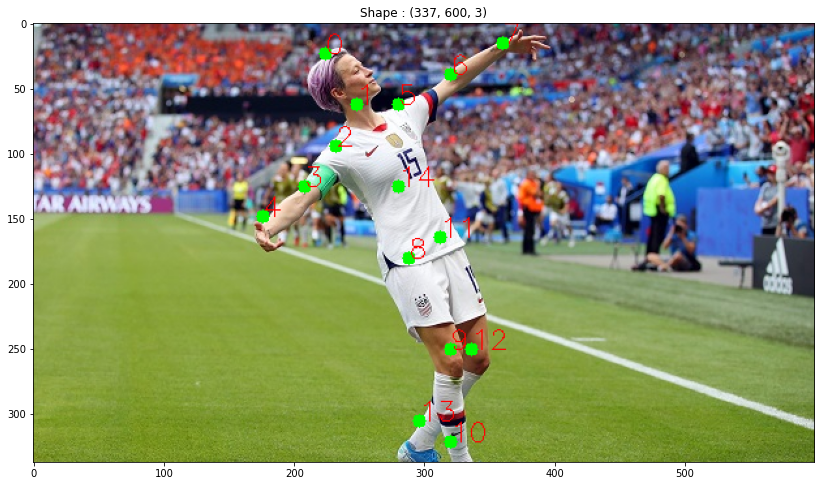

In [19]:
plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {image.shape}")
plt.show()

In [21]:
points_connections = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],[14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]
points_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [23]:
points, points[0], points[3]

([(224, 23),
  (248, 62),
  (232, 94),
  (208, 125),
  (176, 148),
  (280, 62),
  (320, 39),
  (360, 15),
  (288, 180),
  (320, 250),
  (320, 321),
  (312, 164),
  (336, 250),
  (296, 305),
  (280, 125)],
 (224, 23),
 (208, 125))

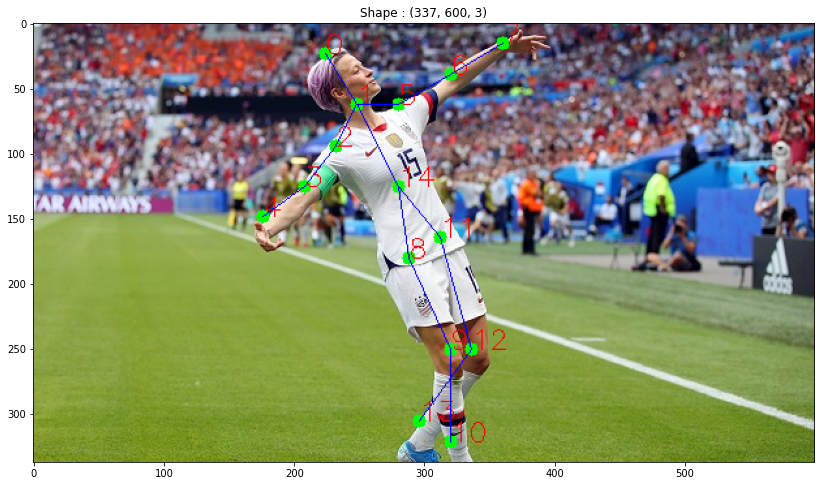

In [24]:
for connection in points_connections:

    partA = connection[0]
    partB = connection[1]

    if points[partA] and points[partB]:
        cv2.line(image, points[partA], points[partB], (255,0,0))

plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {image.shape}")
plt.show()

# Arms Above The Head In Images

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/drive")

Mounted at /content/drive


Shape :  (300, 600, 3)


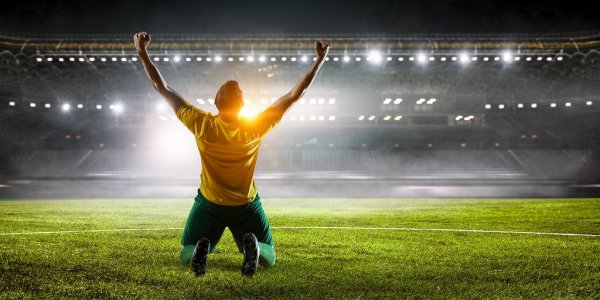

In [17]:
path2 = "/content/drive/MyDrive/OpenCV/Images/player.jpg"
image2 = cv2.imread(path2)
print("Shape : ", image2.shape)
cv2_imshow(image2)

In [18]:
image2_blob = cv2.dnn.blobFromImage(image = image2, scalefactor = 1. / 255,
                                    size = (image2.shape[1], image2.shape[0]))
image2_blob.shape,image2.shape

((1, 3, 300, 600), (300, 600, 3))

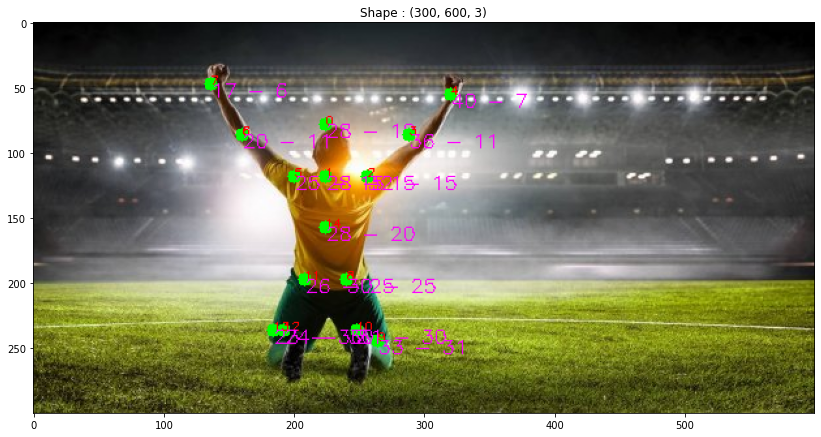

In [21]:
model = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/OpenCV/Weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                 "/content/drive/MyDrive/OpenCV/Weights/pose_iter_160000.caffemodel")

model.setInput(image2_blob)
output2 = model.forward()
output2.shape

position_width = output2.shape[3]
position_height = output2.shape[2]

num_points = 15
points = []
threshold = 0.1


for i in range(num_points):

    confidence_map = output2[0,i,:,:]

    _,confidence,_,point = cv2.minMaxLoc(confidence_map)

    #print(confidence)
    #print(point)

    x = int( (image2.shape[1] * point[0]) / position_width)
    y = int( (image2.shape[0] * point[1]) / position_height)

    if confidence > 0.1:

        cv2.circle(image2,(x,y),5,(0,255,0),-1)
        cv2.putText(image2, "{}".format(i) , (x,y),cv2.FONT_HERSHEY_SIMPLEX, .3,(0,0,255))
        cv2.putText(image2, "{} - {}".format(point[0],point[1]),(x,y+10),cv2.FONT_HERSHEY_SIMPLEX, .5,(255,0,255))

        points.append((x,y))

    else:

        points.append(None)

plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {image2.shape}" )
plt.show()

In [5]:
def verify_arms_up(points):

    # #Sağ el parmak kısmı > right_wrist
    head, right_wrist, left_wrist = 0, 0, 0

    for i, point in enumerate(points):
        #print(point)

        # Burda "y" kordinatlarını alıyoruz !!!

        if i == 0:
            head = point[1]

        elif i == 4:

            right_wrist = point[1]

        elif i == 7:

            left_wrist = point[1]

        
    # Çok dikkat et !!!
    # 100 > 50 y göre bu !!!
    # Eller elbette yukarda olucak !!!

    if right_wrist < head and left_wrist < head:

        return True

    else:

        return False

In [29]:
verify_arms_up(points)

True

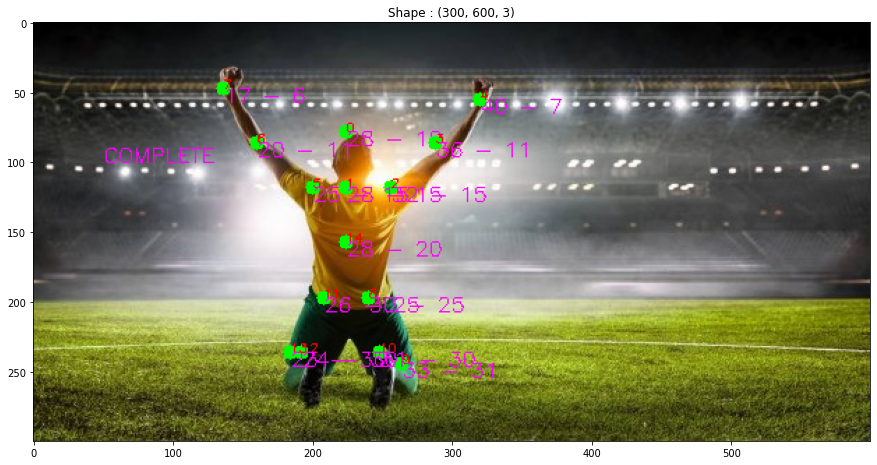

In [30]:
if verify_arms_up(points):
    cv2.putText(image2, "COMPLETE", (50,100), cv2.FONT_HERSHEY_SIMPLEX, .5, (255,0,255))

plt.figure(figsize = (15,10))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {image2.shape}")
plt.show()

# Arms Above The Head In Videos

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


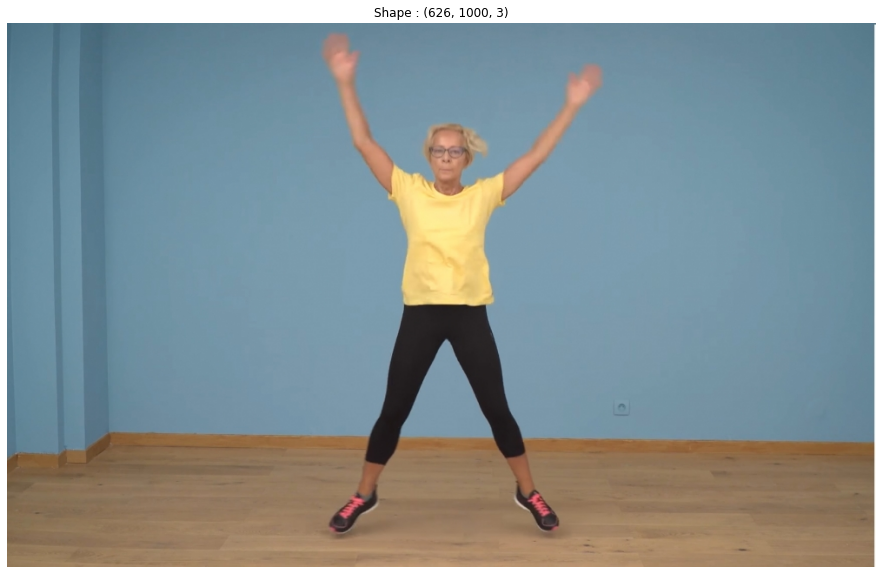

In [3]:
pth = "/content/drive/MyDrive/OpenCV/Images/jump.jpg"
img = cv2.imread(pth)
plt.figure(figsize = (20,10))
plt.title(f"Shape : {img.shape}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

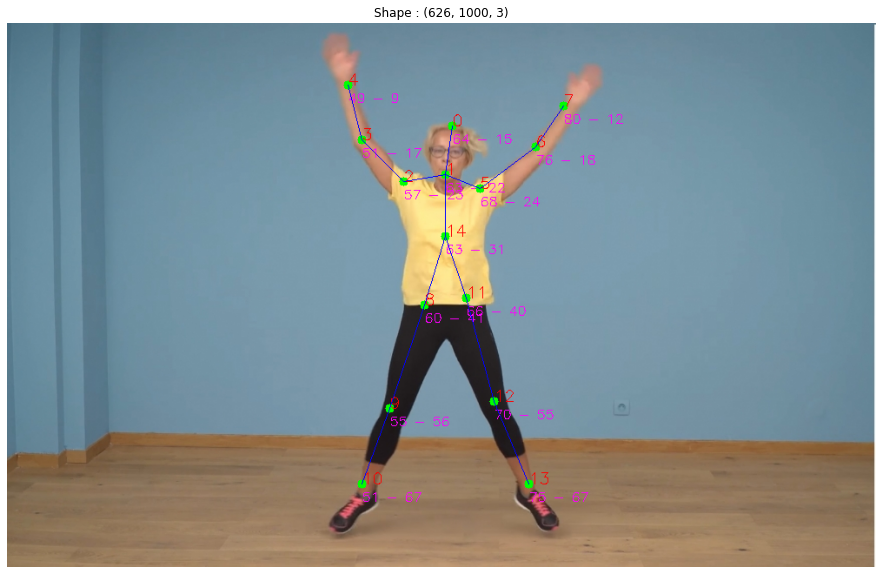

In [4]:
model = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/OpenCV/Weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                 "/content/drive/MyDrive/OpenCV/Weights/pose_iter_160000.caffemodel")

img_blob = cv2.dnn.blobFromImage(image = img, scalefactor = 1. / 255,
                                 size = (img.shape[1], img.shape[0]))

model.setInput(img_blob)
output = model.forward()

position_width = output.shape[3]
position_height = output.shape[2]

points = []
num_classes = 15
threshold = 0.1

for i in range(num_classes):

    confidence_map = output[0,i,:,:]

    _,confidence,_,point = cv2.minMaxLoc(confidence_map)

    x = int((point[0] * img.shape[1]) / position_width)
    y = int((point[1] * img.shape[0]) / position_height)

    if confidence > threshold:

        cv2.circle(img,(x,y),5,(0,255,0),-1)
        cv2.putText(img, "{}".format(i) , (x,y),cv2.FONT_HERSHEY_SIMPLEX, .6,(0,0,255))
        cv2.putText(img, "{} - {}".format(point[0],point[1]),(x,y+20),cv2.FONT_HERSHEY_SIMPLEX, .5,(255,0,255))

        points.append((x,y))

    else:

        points.append(None)

# Bu değerler baş taraf 0, Boyun 1 gibi gidiyor ve bağlantı noktaları
# Bu değerlerin karşılığı points içinde tutmuş olduğumuz kordinaat bölgelerinde saklı !!!

points_connections = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],[14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

for connection in points_connections :

    partA = connection[0]
    partB = connection[1]

    if points[partA] and points[partB]:
        cv2.line(img, points[partA] , points[partB] , (255,0,0))

plt.figure(figsize = (20,10))
plt.title(f"Shape : {img.shape}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [5]:
def verify_arms_up(points):

    # #Sağ el parmak kısmı > right_wrist
    head, right_wrist, left_wrist = 0, 0, 0

    for i, point in enumerate(points):
        #print(point)

        # Burda "y" kordinatlarını alıyoruz !!!

        if i == 0:
            head = point[1]

        elif i == 4:

            right_wrist = point[1]

        elif i == 7:

            left_wrist = point[1]

        
    # Çok dikkat et !!!
    # 100 > 50 y göre bu !!!
    # Eller elbette yukarda olucak !!!

    if right_wrist < head and left_wrist < head:

        return True

    else:

        return False
        
########

def verify_legs_apart(points):

    left_hip,right_hip,left_ankle, right_ankle = 0,0,0,0

    for i,point in enumerate(points):

        if i == 11:

            left_hip = point[0]

        elif i == 8:

            right_hip = point[0]

        elif i == 13:
            
            left_ankle = point[0]

        elif i == 10:

            right_ankle = point[0]

    
    # Burda resme göre değilde kendi şuan ki sağ sola göre düşün.
    # Kesinlikle Öyle Düşün !!!

    if (left_ankle > left_hip) and (right_ankle < right_hip):

        return True
    else:

        return False

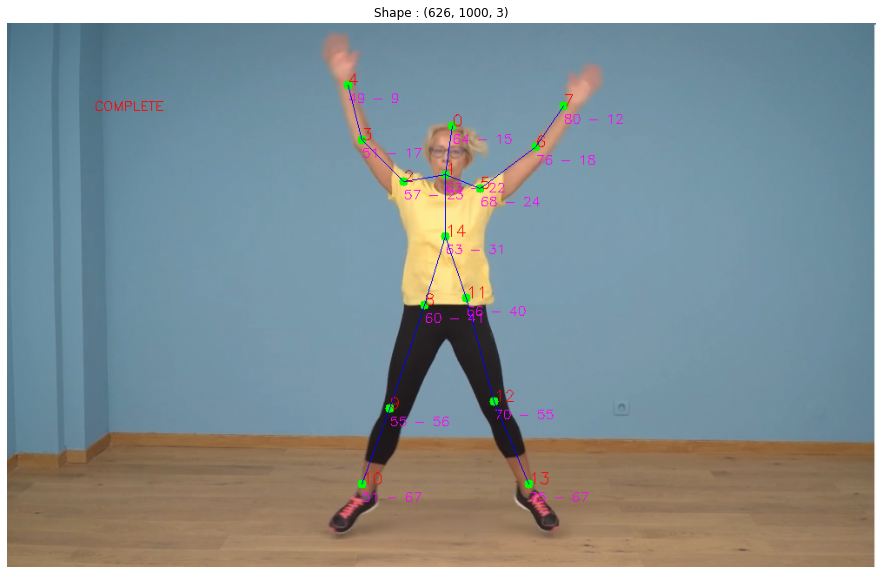

In [6]:
if verify_legs_apart(points) and verify_arms_up(points):

    cv2.putText(img, "COMPLETE", (100,100),cv2.FONT_HERSHEY_SIMPLEX,.5,(0,0,255,5))

plt.figure(figsize = (20,10))
plt.title(f"Shape : {img.shape}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()    

In [7]:
video_path = "/content/drive/MyDrive/OpenCV/Videos/gesture1.mp4"

cap = cv2.VideoCapture(video_path)
conn, frame = cap.read()

fps = 25
results ="/content/drive/MyDrive/OpenCV/Videos/gesture1_results.mp4"
writer = cv2.VideoWriter(results,cv2.VideoWriter_fourcc(*"XVID"),fps ,(frame.shape[1],frame.shape[0]))

In [8]:
threshold = 0.1

model = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/OpenCV/Weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                 "/content/drive/MyDrive/OpenCV/Weights/pose_iter_160000.caffemodel")

points_connections = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],[14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

while cv2.waitKey(1) < 0:

    conn, frame = cap.read()

    if not conn:
        break

    frame_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1. / 255,
                                       size = (256, 256))
    
    model.setInput(frame_blob)
    output = model.forward()
    position_width = output.shape[3]
    position_height = output.shape[2]

    num_points = 15
    points = []

    for i in range(num_points):

        confidence_map = output[0,i,:,:]

        _,confidence,_,point = cv2.minMaxLoc(confidence_map)

        x = int( (point[0] * frame.shape[1]) / position_width)
        y = int( (point[1] * frame.shape[0]) / position_height)


        if confidence > threshold :
            
            cv2.circle(frame, (x,y), 5, (0,255,0),-1)
            cv2.putText(frame,"{}".format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, .7 ,(0, 0, 255))
            points.append((x,y))

        else:

            points.append(None)

    for connection in points_connections:

        partA = connection[0]
        partB = connection[1]

        if points[partA] and points[partB]:

            cv2.line(frame,points[partA],points[partB],(255,0,0))

    if verify_legs_apart(points) and verify_arms_up(points):
        cv2.putText(frame, "Complete", (50,200),cv2.FONT_HERSHEY_COMPLEX,.3,(0,0,255))

    
    cv2_imshow(frame)
    writer.write(frame)

cv2.destroyAllWindows()
writer.release()
cap.release()

Output hidden; open in https://colab.research.google.com to view.